# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Reading in the titanic_test.csv file into a pandas dataframe.

In [2]:
test = pd.read_csv('titanic_test.csv')

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [5]:
test.isnull() #!!!!

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


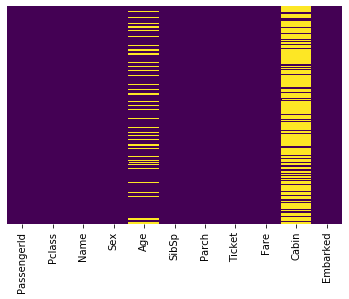

In [4]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

In [5]:
sns.set_style('whitegrid')# !!!

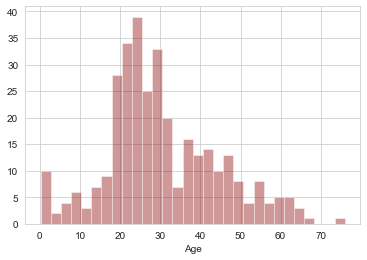

In [6]:
sns.distplot(test['Age'].dropna(),kde=False,color='darkred',bins=30)

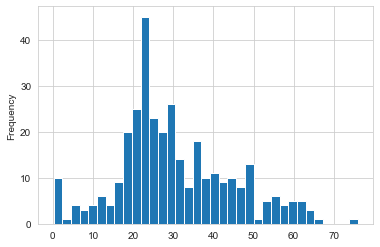

In [10]:
test['Age'].plot.hist(bins=35)

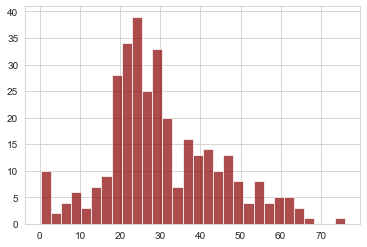

In [11]:
test['Age'].hist(bins=30,color='darkred',alpha=0.7)

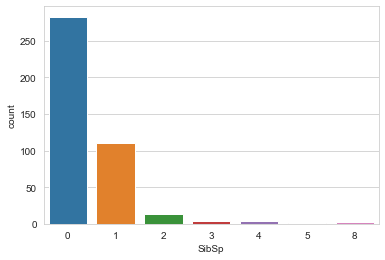

In [12]:
sns.countplot(x='SibSp',data=test) # SibSp = number of siblings or spouses on board

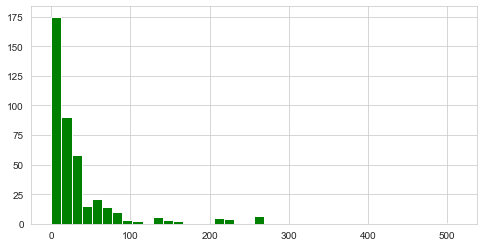

In [7]:
test['Fare'].hist(color='green',bins=40,figsize=(8,4)) # !!!!

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [14]:
import cufflinks as cf
cf.go_offline()

In [15]:
test['Fare'].iplot(kind='hist',bins=30,color='green')

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


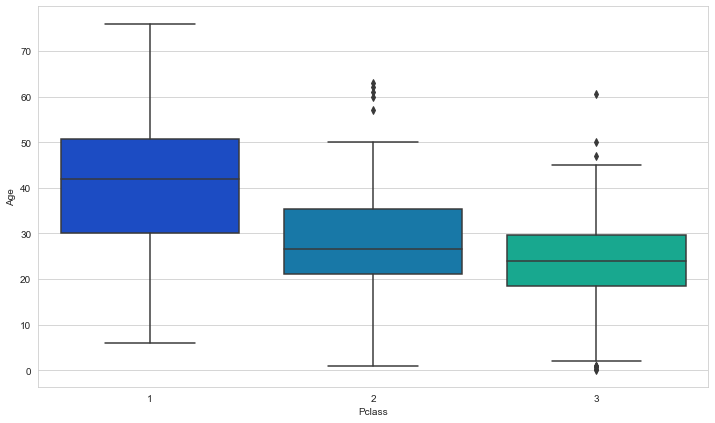

In [8]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=test,palette='winter')

In [9]:
print ('avg age class 1: {:.2f}'.format(test[test['Pclass']==1]['Age'].mean()))
print ('avg age class 2: {:.2f}'.format(test[test['Pclass']==2]['Age'].mean()))
print ('avg age class 3: {:.2f}'.format(test[test['Pclass']==3]['Age'].mean()))

avg age class 1: 40.92
avg age class 2: 28.78
avg age class 3: 24.03


We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [10]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 41

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [11]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1) # apply to columns axis=1

Now let's check that heat map again!

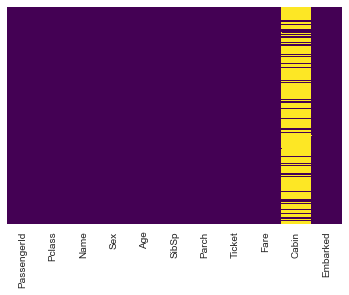

In [12]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [13]:
test.drop('Cabin',axis=1,inplace=True)

In [14]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [15]:
test.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [16]:
# convert categorical variables into dummies

sex = pd.get_dummies(test['Sex'], drop_first=True) # multicollineary one column automatically predicts the other

In [17]:
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [18]:
classid = pd.get_dummies(test['Pclass'], drop_first=True)

** we concatenate these new columns to get a dataframe **

In [19]:
# we will drop information that we are not going to use like Name and Ticket
test.drop(['PassengerId','Sex','Embarked','Pclass','Name','Ticket' ],axis=1,inplace=True)

In [20]:
test.head()

,Age,SibSp,Parch,Fare
0,34.5,0,0,7.8292
1,47.0,1,0,7.0000
2,62.0,0,0,9.6875
3,27.0,0,0,8.6625
4,22.0,1,1,12.2875


In [21]:
test = pd.concat([test,sex,embark, classid],axis=1)

In [22]:
test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [23]:
test.to_csv('test_clean', index=False)